In [1]:
import pylab as plt
import numpy as np
import pandas as pd
import proposal as pp  #installed with pip
import scipy
from scipy import interpolate
from scipy.interpolate import InterpolatedUnivariateSpline
# matplotlib used plotting. Not required to run the code.
import matplotlib.pyplot as plt
import re
import sys
import glob
from MCEq.core import config, MCEqRun
import crflux.models as crf
# matplotlib used plotting. Not required to run the code.
import matplotlib.pyplot as plt
import random
try:
    import cPickle as pickle
except ImportError:
    import pickle
    
from scipy.interpolate import interp2d

In [2]:
CLRS=["gray","firebrick","orchid","deepskyblue","orange","blueviolet","magenta","limegreen","pink","tomato","red","black","yellow","darkgreen"]

energies=[100,250,500,750,1000,1500,2000,3000,4000,5000,6000,7500,8500,10000,11000,12500,15000,20000,25000]
GeV=1000


AreaOfNextNEW=np.pi*(45/2)**2*66 #cm^2 but these dimensions need double checked
NumToRun=1000

k=range(0,90,1)

In [3]:
#MCeQ outputs
#Need for Altitude plots etc unless make an interp function for it as well
r=0

for files in glob.glob('/Users/rogerslc/Documents/MuFluxPred/AIRSdensity/Muons*degrees.h5'):
    #print (files,re.search('Muons(.*)degrees', files))
    run=re.search('Muons(.*)degrees', files)
    ths=int(run.group(1))
    if r==0:
        mussimData=pd.read_hdf(files)
        mussimData['theta']=    ths
        r+=1
    else:
        df=pd.read_hdf(files)
        df['theta']=ths
        mussimData=mussimData.append(df, ignore_index=True)

#for sea level altitudes at 0 degrees       
df=pd.read_hdf('/Users/rogerslc/Documents/MuFluxPred/AIRSdensity/Muons0degrees_0altitude.h5')
df['theta']=0
mussimData=mussimData.append(df, ignore_index=True)

#for sea level altitudes at 89 degrees   
df=pd.read_hdf('/Users/rogerslc/Documents/MuFluxPred/AIRSdensity/Muons89degrees_0altitude.h5')
df['theta']=89
mussimData=mussimData.append(df, ignore_index=True)


mussimData['altitude']=mussimData.altitude*10**-2    
k=mussimData.theta.unique()
k.sort()
l=mussimData.phis.unique()
print(k)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]


In [4]:
#these were for creating the interpolation functions and shouldn't be needed again unless change something in MCeQ
'''k=mussimData.theta.unique()
k.sort()

df=mussimData[(mussimData.MuFLux>10**-9)]
Es=df.Energies.unique()
Es.sort()
    
alt=1431   
flxs=[] 
for theta in k:

    for nrg in Es:
        flxs.append(mussimData[(mussimData.theta==theta)&(mussimData.Energies==nrg)&(mussimData.altitude==alt)].MuFLux.iloc[0])           

        
flxarray=np.array(flxs)
flxarray = flxarray.reshape(len(k), len(Es))
FluxMuons=scipy.interpolate.RectBivariateSpline(k,Es,flxarray,s=0,kx=3, ky=3)

with open('/Users/rogerslc/Documents/MuFluxPred/MCeQ_Muons_interpolator_ALL.pkl', 'wb') as f:
    pickle.dump(FluxMuons, f)'''

'''Es=mussimData[(mussimData.MuFLux>10**-9)&(mussimData.theta==45)].Energies
Es=Es.unique()
Es.sort()
l=mussimData.phis.unique()
l.sort()
flxs=[]  
# The lines below are for plotting with matplotlib
for phi in l:
    #print(theta)
    df=mussimData[(mussimData.phis==phi)&(mussimData.MuFLux>10**-9)&(mussimData.theta==45)]

    for nrg in Es:
        flxs.append(df[(df.Energies==nrg)].MuFLux.iloc[0])
        if (df[(df.Energies==nrg)].MuFLux.iloc[0]<0):
            print(nrg,phi,df[(df.Energies==nrg)].MuFLux.iloc[0])
        if len(df[(df.Energies==nrg)].MuFLux) == 0:
            print( nrg, phi)
                

flxarray=np.array(flxs)
flxarray = flxarray.reshape(len(l), len(Es))
FluxMuons=scipy.interpolate.RectBivariateSpline(l,Es,flxarray,s=0,kx=3, ky=3)

with open('/Users/rogerslc/Documents/MuFluxPred/MCeQ_Muons_interpolator_PhisPlusNRG.pkl', 'wb') as f:
    pickle.dump(FluxMuons, f)'''

"Es=mussimData[(mussimData.MuFLux>10**-9)&(mussimData.theta==45)].Energies\nEs=Es.unique()\nEs.sort()\nl=mussimData.phis.unique()\nl.sort()\nflxs=[]  \n# The lines below are for plotting with matplotlib\nfor phi in l:\n    #print(theta)\n    df=mussimData[(mussimData.phis==phi)&(mussimData.MuFLux>10**-9)&(mussimData.theta==45)]\n\n    for nrg in Es:\n        flxs.append(df[(df.Energies==nrg)].MuFLux.iloc[0])\n        if (df[(df.Energies==nrg)].MuFLux.iloc[0]<0):\n            print(nrg,phi,df[(df.Energies==nrg)].MuFLux.iloc[0])\n        if len(df[(df.Energies==nrg)].MuFLux) == 0:\n            print( nrg, phi)\n                \n\nflxarray=np.array(flxs)\nflxarray = flxarray.reshape(len(l), len(Es))\nFluxMuons=scipy.interpolate.RectBivariateSpline(l,Es,flxarray,s=0,kx=3, ky=3)\n\nwith open('/Users/rogerslc/Documents/MuFluxPred/MCeQ_Muons_interpolator_PhisPlusNRG.pkl', 'wb') as f:\n    pickle.dump(FluxMuons, f)"

In [5]:
90*106

9540

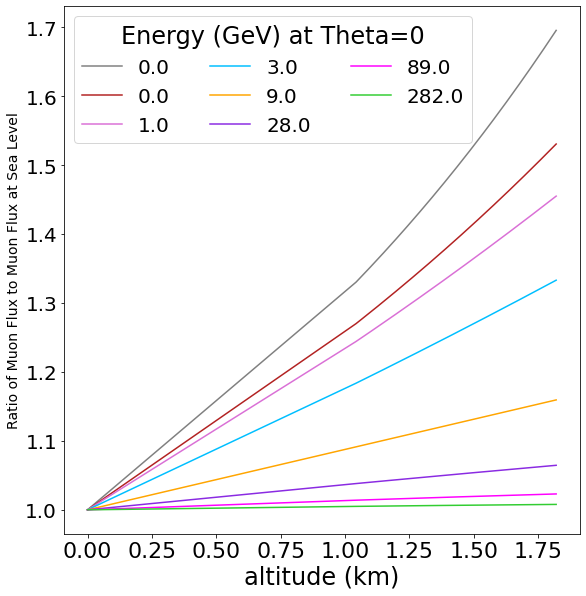

In [6]:
#comparing to figure 4 in http://pcbat1.mi.infn.it/~battist/astrop/lipari_lepton.pdf


clr=0
ts=0
plt.figure(figsize=(8,8))

NT=mussimData[mussimData.theta==ts].Energies.unique()
for E in NT[0:37:5]: #lower energies matching plot
    #for E in NT[40:len(NT)-10:10]: #higher energies
    pt=mussimData[(mussimData.theta==ts)&(mussimData.Energies==E)] 
    dem=pt[pt.altitude==0].MuFLux
    plt.plot(pt.altitude*10**-3,pt.MuFLux/dem.iloc[0],color=CLRS[clr],label=str(np.round(E,0)))
    clr+=1    
    
#plt.yscale('log')
#plt.xscale('log')
plt.xticks(fontsize=22)
plt.yticks(fontsize=20)
plt.tight_layout()
#plt.xlim(1., 2e2)
plt.xlabel('altitude (km)',fontsize=24)
#ylim(.99, 1.1)
plt.ylabel('Ratio of Muon Flux to Muon Flux at Sea Level',fontsize=14)
plt.legend(fontsize=20,title='Energy (GeV) at Theta='+str(ts),title_fontsize=24,ncol=3,loc='upper left')
plt.show()

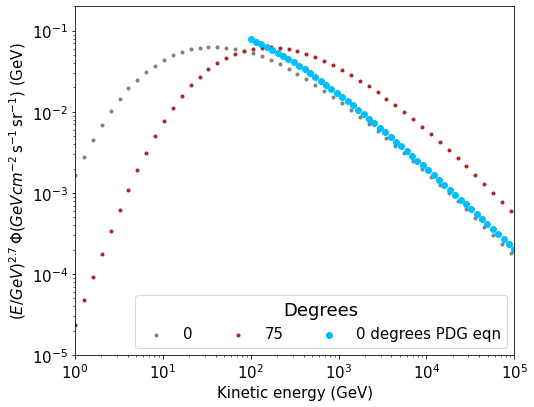

In [7]:
nrgs=np.geomspace(1,10**8,80)

#for comparing to PDG plot

plt.figure(figsize=(7,5.5))

clr=0

for theta in range(0,90,75):

    flxs=[]     
    err=[]
    
    
    #MCeq data
    #bring in the intorpolation funcs
    with open('/Users/rogerslc/Documents/MuFluxPred/MCeQ_Muons_interpolator'+str(theta)+'.pkl', 'rb') as f:
        FluxMuons = pickle.load(f)
    
    for NG in nrgs:
        flxs.append(FluxMuons(NG,650)[0][0]) #NG is energy in GeV, 650 is an altitude choice in meters
        
    plt.scatter(nrgs, flxs*nrgs**-.3, label=str(theta),s=9,color=CLRS[clr])
     #plt.scatter(x*GeV/10**6, y, label='_nolegend_',alpha=.3,s=8,color=CLRS[clr])      
    clr+=1


#plotting eqn from PDG
theta=0
clr+=1

for theta in [0]:
    cnt=0
    for E in np.geomspace(100,10**5,50):

        if E <100/np.cos(np.deg2rad(theta)):
            continue
        if cnt==0:
            plt.scatter(E,((.14)*(1/(1+1.1*E*np.cos(np.deg2rad(theta))/115)+.054/(1+1.1*E*np.cos(np.deg2rad(theta))/850))),color=CLRS[clr],label=str(theta)+' degrees PDG eqn')
        else:
            plt.scatter(E,((.14)*(1/(1+1.1*E*np.cos(np.deg2rad(theta))/115)+.054/(1+1.1*E*np.cos(np.deg2rad(theta))/850))),color=CLRS[clr])
        cnt+=1    
    clr=+2
    


    
plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.xlim(1, 10**5)
plt.xlabel('Kinetic energy (GeV)',fontsize=15)
plt.ylim(10**-5, .2)

plt.ylabel(r'$(E/ {GeV})^{2.7}\,\Phi (GeV cm^{-2}\,$s$^{-1}\,$sr$^{-1}$) (GeV)',fontsize=15)
plt.legend(fontsize=15,title='Degrees',title_fontsize=18,ncol=4,loc='lower right')
#plt.savefig("/Users/rogerslc/Documents/MuFluxPred/FluxesForSomeDeg.png",dpi=250,bbox_inches='tight')
plt.show()





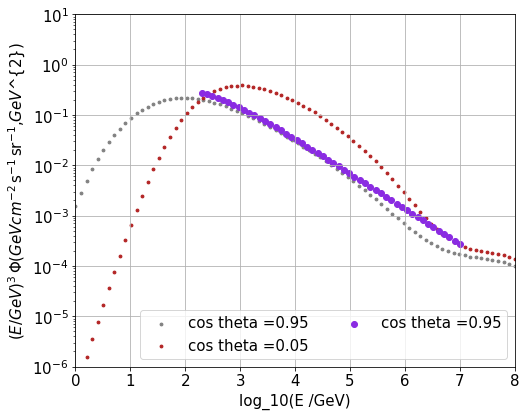

In [8]:
nrgs=np.geomspace(1,10**8,80)

#for comparing to fig 3 right in https://arxiv.org/pdf/1910.08676.pdf

plt.figure(figsize=(7,5.5))
clr=0

for theta in range(18,90,69):

    flxs=[]     
    flxs2=[]
    err=[]

    
    #MCeq data
    #bring in the intorpolation funcs
    with open('/Users/rogerslc/Documents/MuFluxPred/MCeQ_Muons_interpolator'+str(theta)+'.pkl', 'rb') as f:
        FluxMuons = pickle.load(f)
    
    for NG in nrgs:
        flxs.append(FluxMuons(NG,650)[0][0]) #NG is energy in GeV, 650 is an altitude choice in meters


    plt.scatter(np.log10(nrgs), flxs, label='cos theta ='+str(np.round(np.cos(np.deg2rad(theta)),2)),s=8,color=CLRS[clr])
    clr+=1

   

#plotting eqn from PDG
theta=18

cnt=0
for E in np.geomspace(200,10**7,50):

    if E <100/np.cos(np.deg2rad(theta)):
        print(E)
        continue
    if cnt==0:
        plt.scatter(np.log10(E),((.14)*(1/(1+1.1*E*np.cos(np.deg2rad(theta))/115)+.054/(1+1.1*E*np.cos(np.deg2rad(theta))/850)))*E**.3,color=CLRS[clr+3],label='cos theta ='+str(np.round(np.cos(np.deg2rad(theta)),2)))
    else:
        plt.scatter(np.log10(E),((.14)*(1/(1+1.1*E*np.cos(np.deg2rad(theta))/115)+.054/(1+1.1*E*np.cos(np.deg2rad(theta))/850)))*E**.3,color=CLRS[clr+3])
    cnt+=1

plt.yscale('log')
#plt.xscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
#plt.xlim(Nmin*GeV, 1100)
plt.xlim(0, 8)
plt.xlabel('log_10(E /GeV)',fontsize=15)
#plt.ylim(4e-8, 4e-3)
#plt.ylim(4e-3, 1.)
plt.ylim(10**-6, 10**1)
plt.grid()

plt.ylabel(r'$(E/ {GeV})^{3}\,\Phi (GeV cm^{-2}\,$s$^{-1}\,$sr$^{-1}$,$GeV$^{2}$)$',fontsize=15)
plt.legend(fontsize=15,title_fontsize=18,ncol=2,loc='lower right')
#plt.savefig("/Users/rogerslc/Documents/MuFluxPred/FluxesForSomeDeg.png",dpi=250,bbox_inches='tight')
plt.show()

    

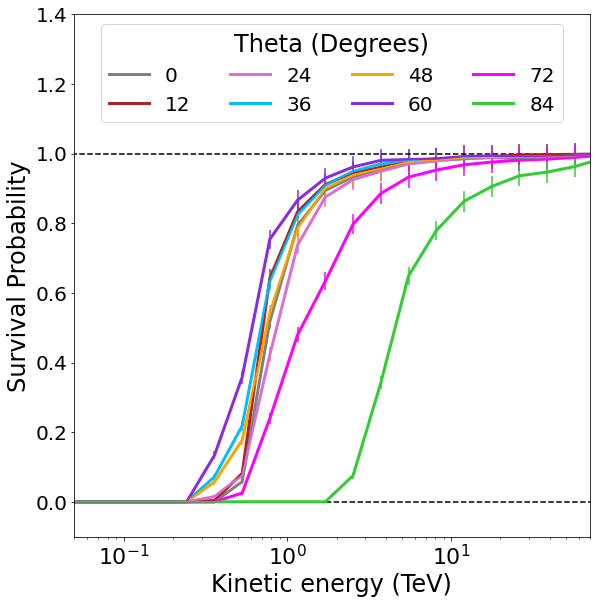

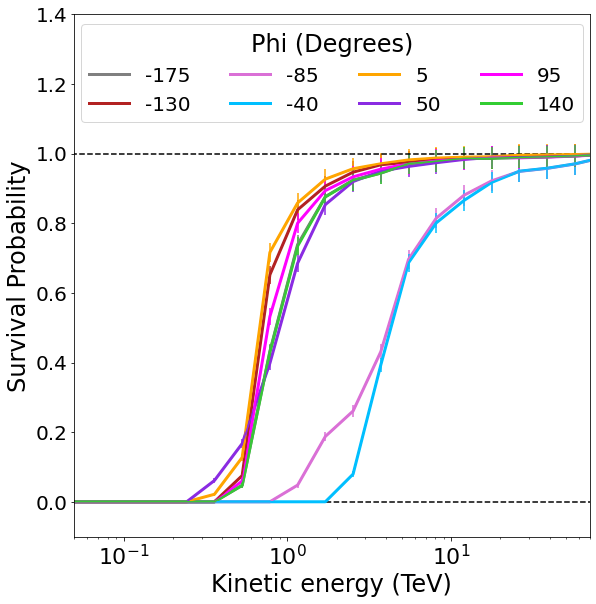

In [9]:

plt.figure(figsize=(8,8))

#bring in the intorpolation funcs
with open('/Users/rogerslc/PROPOSAL/PROPOSAL/Proposal_Muons_interpolator_ALL.pkl', 'rb') as f:
    PercentMuons = pickle.load(f) #use as PercentMuons(energy,theta)

clr=0
nrgs=np.geomspace(np.min(energies)*10**-3,4e5,40)
#nrgs=energies*10**-3

    
# The lines below are for plotting with matplotlib
#for theta in k:
for theta in range(0,90,12):
    flxs=[]     
    err=[]
    for NG in  nrgs:     
        flxs.append(PercentMuons(NG,theta)[0])   
        err.append((PercentMuons(NG,theta)[0]*NumToRun)**.5/1000)
    plt.plot(nrgs*10**-3,flxs,linewidth=3,color=CLRS[clr], label=str(theta))
    plt.errorbar(nrgs*10**-3,flxs,yerr=err,xerr=None,color=CLRS[clr])
    clr+=1
    
plt.hlines(0,10**-2,10**2,color='k',linestyle='--')
plt.hlines(1,10**-2,10**2,color='k',linestyle='--')

plt.xscale('log')
plt.xticks(fontsize=22)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.xlim(.05, 7e1)
plt.xlabel('Kinetic energy (TeV)',fontsize=24)
#plt.ylim(-4e-3, 4e-3)
plt.ylim(-.1, 1.4)

plt.ylabel(r'Survival Probability',fontsize=24)
plt.legend(fontsize=20,title='Theta (Degrees)',title_fontsize=24,ncol=4,loc='upper center')
#plt.savefig("/Users/rogerslc/Documents/MuFluxPred/FluxesForSomeDeg.png",dpi=250,bbox_inches='tight')
plt.show()


plt.figure(figsize=(8,8))

#bring in the intorpolation funcs
with open('/Users/rogerslc/PROPOSAL/PROPOSAL/Proposal_Muons_interpolator_ALL_Phi.pkl', 'rb') as f:
    PercentMuons = pickle.load(f) #use as PercentMuons(energy,theta)

clr=0
nrgs=np.geomspace(np.min(energies)*10**-3,4e5,40)
#nrgs=energies*10**-3

    
# The lines below are for plotting with matplotlib
for phi in range(-175,180,45):
    flxs=[]     
    err=[]
    for NG in  nrgs:     
        flxs.append(PercentMuons(NG,phi)[0])   
        err.append((PercentMuons(NG,phi)[0]*NumToRun)**.5/1000)
    plt.plot(nrgs*10**-3,flxs,linewidth=3,color=CLRS[clr], label=str(phi))
    plt.errorbar(nrgs*10**-3,flxs,yerr=err,xerr=None,color=CLRS[clr])
    clr+=1
    
plt.hlines(0,10**-2,10**2,color='k',linestyle='--')
plt.hlines(1,10**-2,10**2,color='k',linestyle='--')
plt.xscale('log')
plt.xticks(fontsize=22)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.xlim(.05, 7e1)
plt.xlabel('Kinetic energy (TeV)',fontsize=24)
#plt.ylim(-4e-3, 4e-3)
plt.ylim(-.1, 1.4)

plt.ylabel(r'Survival Probability',fontsize=24)
plt.legend(fontsize=20,title='Phi (Degrees)',title_fontsize=24,ncol=4,loc='upper center')
#plt.savefig("/Users/rogerslc/Documents/MuFluxPred/FluxesForSomeDeg.png",dpi=250,bbox_inches='tight')
plt.show()

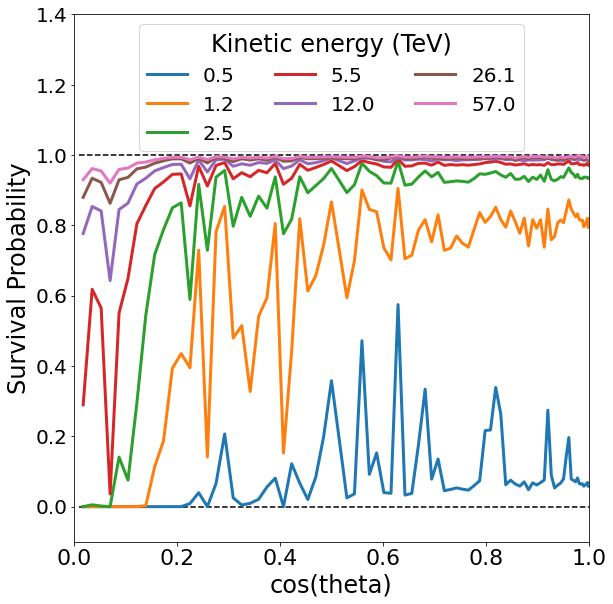

In [10]:

plt.figure(figsize=(8,8))


#bring in the intorpolation funcs
with open('/Users/rogerslc/PROPOSAL/PROPOSAL/Proposal_Muons_interpolator_ALL.pkl', 'rb') as f:
    PercentMuons = pickle.load(f) #use as PercentMuons(energy,theta)

clr=0
nrgs=np.geomspace(np.min(energies)*10**-3,4e5,40)
#nrgs=energies*10**-3

    
# The lines below are for plotting with matplotlib
#for theta in k:
for NG in  nrgs[22:len(nrgs)-5:2]:   

    flxs=[]     
    err=[]
    for theta in k:
        flxs.append(PercentMuons(NG,theta)[0])   
        err.append((PercentMuons(NG,theta)[0]*NumToRun)**.5/1000)
    #plt.plot(nrgs*(GeV/10**6),flxs,linewidth=3,color=CLRS[clr], label=str(theta))
    #plt.errorbar(nrgs*(GeV/10**6),flxs,yerr=err,xerr=None,color=CLRS[clr])
    plt.plot(np.cos(np.deg2rad(k)),flxs,linewidth=3, label=str(np.round(NG*10**-3,1)))
    #plt.plot(k,flxs,linewidth=3, label=str(np.round(NG,1)))
    clr+=1
    
plt.hlines(0,10**-2,10**2,color='k',linestyle='--')
plt.hlines(1,10**-2,10**2,color='k',linestyle='--')

#plt.yscale('log')
#plt.xscale('log')
plt.xticks(fontsize=22)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.xlim(0, 1)
plt.xlabel('cos(theta)',fontsize=24)
#plt.ylim(-4e-3, 4e-3)
plt.ylim(-.1, 1.4)

plt.ylabel(r'Survival Probability',fontsize=24)
plt.legend(fontsize=20,title='Kinetic energy (TeV)',title_fontsize=24,ncol=3,loc='upper center')
#plt.savefig("/Users/rogerslc/Documents/MuFluxPred/FluxesForSomeDeg.png",dpi=250,bbox_inches='tight')
plt.show()





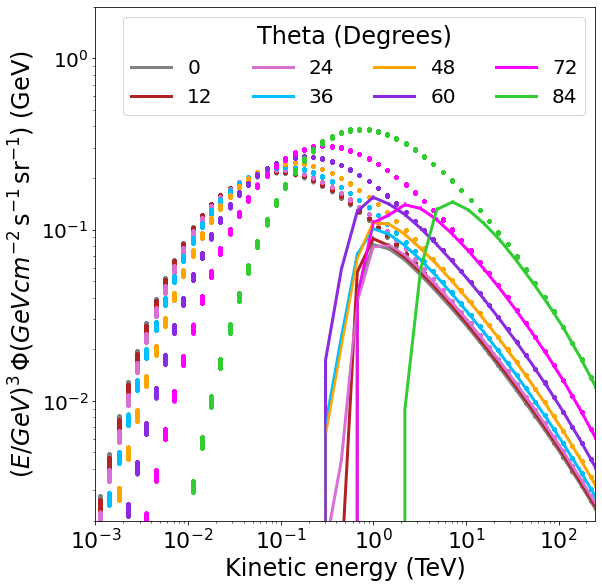

In [11]:
#need to multiply flux by percent
plt.figure(figsize=(8,8))
# Obtain the result
# Multiply fluxes be E**mag to resolve the features of the steep spectrum

k=mussimData.theta.unique()
k.sort()

#bring in the intorpolation funcs
with open('/Users/rogerslc/PROPOSAL/PROPOSAL/Proposal_Muons_interpolator_ALL.pkl', 'rb') as f:
    PercentMuons = pickle.load(f) #use as PercentMuons(energy,theta)

clr=0
Nmin=.001
nrgs=np.geomspace(Nmin,2.5e5,50)


    
# The lines below are for plotting with matplotlib
#for theta in k:
for theta in range(0,90,12):

    flxs=[]     
    flxs2=[]
    err=[]
    with open('/Users/rogerslc/Documents/MuFluxPred/MCeQ_Muons_interpolator'+str(theta)+'.pkl', 'rb') as f:
        FluxMuons = pickle.load(f)
    for NG in nrgs:            
        flxs.append(FluxMuons(NG,650)[0][0]*PercentMuons(NG,theta)[0])   
        flxs2.append(FluxMuons(NG,650)[0][0])
        err.append((FluxMuons(NG,650)[0][0]*PercentMuons(NG,theta)[0])/NumToRun**.5)
        #print(NG,FluxMuons(NG,650)[0][0])

    #plt.plot(nrgs*GeV/10**6,flxs2,linewidth=6,color=CLRS[clr], label='_nolegend_')    
    plt.errorbar(nrgs*(GeV/10**6),flxs,yerr=err,xerr=None,color=CLRS[clr], label='_nolegend_')
      
    plt.plot(nrgs*GeV/10**6,flxs,linewidth=3,color=CLRS[clr], label=str(theta))

    
    #MCeq data
    df=mussimData[(mussimData.theta==theta)&(mussimData.MuFLux>10**-9)&(mussimData.Energies>4)]  
    x=df.Energies
    y=df.MuFLux
    
    x=mussimData[(mussimData.theta==theta)&(mussimData.MuFLux>10**-9)].Energies*GeV/10**6
    y=mussimData[(mussimData.theta==theta)&(mussimData.MuFLux>10**-9)].MuFLux
    plt.scatter(x, y, label='_nolegend_',s=8,color=CLRS[clr])
    
    #plt.scatter(x*GeV/10**6, y, label='_nolegend_',alpha=.3,s=8,color=CLRS[clr])      
    clr+=1
    
#for N in energies:
    #plt.vlines(N*(GeV/10**6),2e-3, 9e-1)
    
plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=22)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.xlim(Nmin, 2.5e2)
#plt.xlim(.4, 1.1)
plt.xlabel('Kinetic energy (TeV)',fontsize=24)
#plt.ylim(4e-8, 4e-3)
#plt.ylim(4e-3, 1.)
plt.ylim(2e-3, 2e0)

plt.ylabel(r'$(E/ {GeV})^3\,\Phi (GeV cm^{-2}\,$s$^{-1}\,$sr$^{-1}$) (GeV)',fontsize=24)
plt.legend(fontsize=20,title='Theta (Degrees)',title_fontsize=24,ncol=4,loc='upper right')
#plt.savefig("/Users/rogerslc/Documents/MuFluxPred/FluxesForSomeDeg.png",dpi=250,bbox_inches='tight')
plt.show()




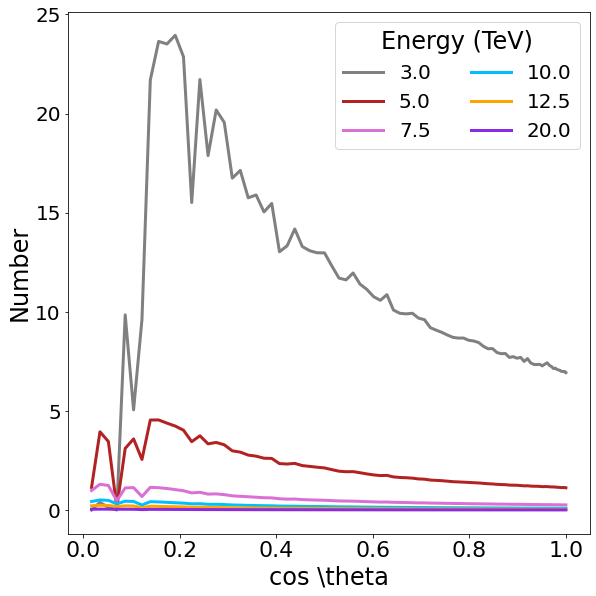

In [12]:
#need to multiply flux by percent
plt.figure(figsize=(8,8))
# Obtain the result
# Multiply fluxes be E**mag to resolve the features of the steep spectrum

k=mussimData.theta.unique()
k.sort()
#k=range(0,90,5)
'''
#bring in the intorpolation funcs
with open('/Users/rogerslc/Documents/MuFluxPred/MCeQ_Muons_interpolator_ALL.pkl', 'rb') as f:
    FluxMuons = pickle.load(f) #use as FluxMuons(theta,energy)'''

with open('/Users/rogerslc/PROPOSAL/PROPOSAL/Proposal_Muons_interpolator_ALL.pkl', 'rb') as f:
    PercentMuons = pickle.load(f) #use as PercentMuons(energy,theta)

clr=0
Nmin=.1/(GeV/10**6)
Nmax=4/(GeV/10**6)
#nrgs=np.linspace(Nmin,Nmax,10)
nrgs=energies
Nmin=.001
#nrgs=np.geomspace(Nmin,2.5e5,50)

    
# The lines below are for plotting with matplotlib
#for theta in k:

for NG in  nrgs[7:len(nrgs):2]:  
    flxs=[]     
    flxs2=[]
    err=[]
    #with open('/Users/rogerslc/PROPOSAL/PROPOSAL/Proposal_Muons_interpolator'+str(NG*10**3)+'TeV.pkl', 'rb') as f:
        #PercentMuons = pickle.load(f)



    for thetas in k:  
        
        with open('/Users/rogerslc/Documents/MuFluxPred/MCeQ_Muons_interpolator'+str(thetas)+'.pkl', 'rb') as f:
            FluxMuons = pickle.load(f)
        flxs.append(FluxMuons(NG,650)[0][0]*PercentMuons(NG,thetas)[0]/NG**3*(365.25*24*60*60)*AreaOfNextNEW)   
        err.append((FluxMuons(NG,650)[0][0]*PercentMuons(NG,thetas)[0])/NumToRun**.5)
        #print(np.round(np.cos(np.deg2rad(thetas)),2),np.round(NG,2),FluxMuons(NG,650)[0][0],PercentMuons(NG,thetas)[0])

    #plt.errorbar(nrgs*(GeV/10**6),flxs,yerr=err,xerr=None,color=CLRS[clr], label='_nolegend_')
      
    plt.plot(np.cos(np.deg2rad(k)),flxs,linewidth=3, label=str(np.round(NG*(GeV/10**6),2)),color=CLRS[clr])
    #plt.plot(k,flxs,linewidth=3, label=str(np.round(NG*(GeV/10**6),2)))

    
    #plt.scatter(x*GeV/10**6, y, label='_nolegend_',alpha=.3,s=8,color=CLRS[clr])      
    clr+=1
    
#plt.yscale('log')
#plt.xscale('log')
plt.xticks(fontsize=22)
plt.yticks(fontsize=20)
plt.tight_layout()
#plt.xlim(1e-1, 2.5e3)
plt.xlabel(r'cos \theta',fontsize=24)
#plt.ylim(-.01, .3)
#plt.ylim(4e-3, 1.)
#plt.ylim(2e-3, 9e-1)

plt.ylabel('Number',fontsize=24)
plt.legend(fontsize=20,title='Energy (TeV)',title_fontsize=24,ncol=2,loc='upper right')
#plt.savefig("/Users/rogerslc/Documents/MuFluxPred/FluxesYear.png",dpi=250,bbox_inches='tight')
plt.show()






In [25]:
stpsize=15

binsa=np.linspace(0,360+360/stpsize+360/(stpsize*2),stpsize)
bin_centersa = binsa[:-1] + np.diff(binsa) / 2
bin_edgesa=binsa[:-1] 

binsz=np.linspace(0,1+1/stpsize+1/(stpsize*3),stpsize)
bin_centersz = binsz[:-1] + np.diff(binsz) / 2
bin_edgesz=binsz[:-1] 

In [26]:
#k=range(0,90,1)
for t in k:
    mussimData[mussimData.theta==t]*np.sin(np.deg2rad(t))
    HISTDATZ=mussimData[mussimData.phis==-100.33]

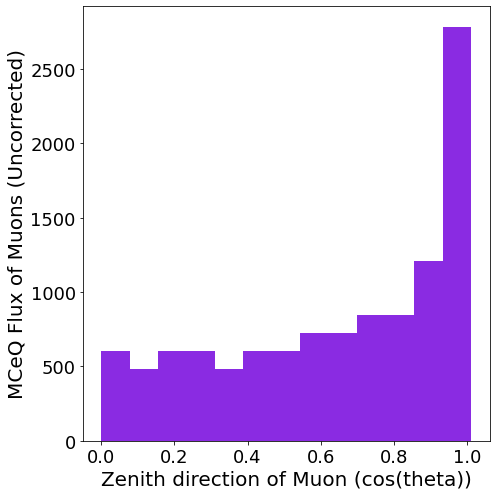

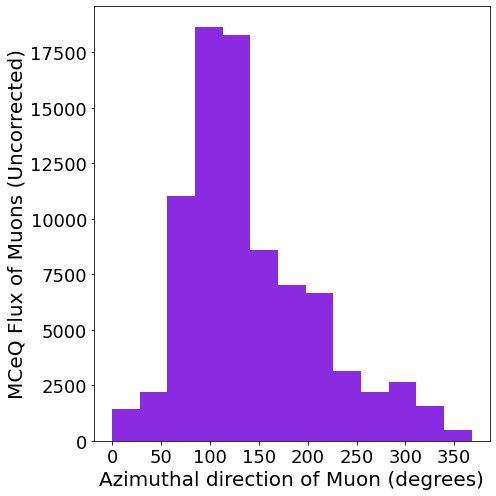

In [27]:
HISTDATA=mussimData[mussimData.theta==36]
HISTDATZ=mussimData[mussimData.phis==-100.33]
azihisto, _ = np.histogram(HISTDATA.phis+180, bins = binsa)
zenhisto, _ = np.histogram(np.cos(np.deg2rad(HISTDATZ.theta)), bins = binsz)

plt.figure(figsize=(7,7))
plt.hist(bin_centersz,weights=zenhisto,bins=bin_edgesz, color=CLRS[5])


plt.yticks(fontsize=18)  
plt.xticks(fontsize=18) 
#plt.xlim(0,360)  

plt.ylabel('MCeQ Flux of Muons (Uncorrected)',fontsize=20)
plt.xlabel('Zenith direction of Muon (cos(theta))',fontsize=20)
plt.tight_layout()
#plt.legend(fontsize=18,loc="upper center", ncol=3, title="Mass Fraction of $^{3}$He",title_fontsize=18)
#plt.savefig('passazi.png',dpi=250,bbox_inches='tight')
plt.show()


plt.figure(figsize=(7,7))
plt.hist(bin_centersa,weights=azihisto,bins=bin_edgesa, color=CLRS[5])

plt.yticks(fontsize=18)  
plt.xticks(fontsize=18) 

plt.ylabel('MCeQ Flux of Muons (Uncorrected)',fontsize=20)
plt.xlabel('Azimuthal direction of Muon (degrees)',fontsize=20)
plt.tight_layout()
#plt.legend(fontsize=18,loc="upper center", ncol=3, title="Mass Fraction of $^{3}$He",title_fontsize=18)
#plt.savefig('passazi.png',dpi=250,bbox_inches='tight')
plt.show()



